In [1]:
import pandas, numpy

In [2]:
import scipy, scipy.stats

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
input_file = 'cAMP HLMVEC.xlsx'

In [5]:
df = pandas.read_excel(input_file)
sub = df.iloc[4:12, 14:23]
sub

,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
4,45254.390667,52108.460667,90091.819667,49264.194667,47996.640667,82721.452667,36090.905667,38037.054667,95998.319667
5,46914.569667,51221.171667,95169.765667,50054.093667,53767.108667,72972.101667,41515.108667,46572.952667,97080.374667
6,44997.788667,44218.702667,84969.046667,40717.468667,46521.936667,78053.140667,39865.733667,46579.132667,80951.515667
7,56770.585667,58486.421667,93874.390667,NaN,52654.124667,76899.976667,40680.366667,48797.366667,90218.577667
8,NaN,67201.632667,101220.022667,NaN,59206.765667,91600.515667,NaN,44589.694667,NaN
9,50077.280667,NaN,83792.694667,42014.397667,43918.819667,NaN,NaN,43136.647667,89708.460667
10,NaN,57481.655667,89009.757667,40689.640667,55597.327667,75504.116667,43370.061667,NaN,84862.382667
11,57653.233667,58916.155667,91428.937667,42244.726667,51085.140667,76017.327667,39286.061667,NaN,98238.179667


In [6]:
a = numpy.nanmedian(sub.iloc[:, 0])
b = numpy.nanmedian(sub.iloc[:, 3])
c = numpy.nanmedian(sub.iloc[:, 6])
control = [a, b, c]

a = numpy.nanmedian(sub.iloc[:, 0+1])
b = numpy.nanmedian(sub.iloc[:, 3+1])
c = numpy.nanmedian(sub.iloc[:, 6+1])
half = [a, b, c]

a = numpy.nanmedian(sub.iloc[:, 0+2])
b = numpy.nanmedian(sub.iloc[:, 3+2])
c = numpy.nanmedian(sub.iloc[:, 6+2])
five = [a, b, c]

print(control)
print(half)
print(five)

[48495.925166666646, 42129.56216666664, 40273.05016666664]
[57481.655666666644, 51869.63266666664, 45581.32366666664]
[90760.37866666664, 76899.97666666664, 90218.57766666664]


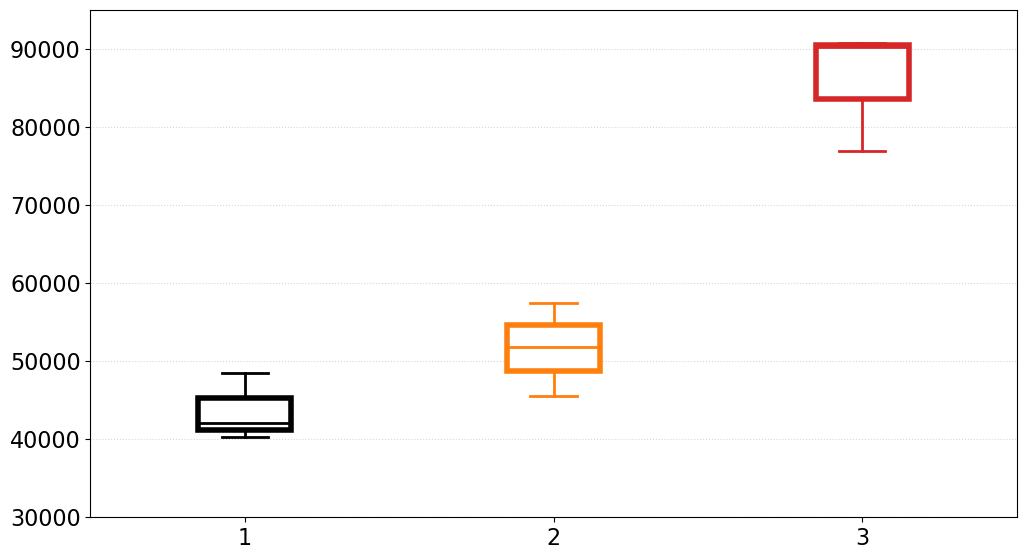

In [7]:
colors = ['black', 'tab:orange', 'tab:red']
measurements = [control, half, five]

bplot = matplotlib.pyplot.boxplot(measurements,
                                  showfliers=False,
                                  patch_artist=True, 
                                  medianprops={'color':'black', 'linewidth':2},
                                  boxprops={'linewidth':4}, 
                                  whiskerprops={'linewidth':2},
                                  capprops={'linewidth':2})

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor('white')
    patch.set_edgecolor(color)

for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)

for i in range(len(bplot['whiskers'])):    
    index = int(numpy.floor(i/2))
    color = colors[index]
    bplot['whiskers'][i].set_color(color)
    bplot['caps'][i].set_color(color)

matplotlib.pyplot.ylim(30000, 95000)
matplotlib.pyplot.grid(ls=':', alpha=0.5, axis='y')
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('camp.svg')

In [8]:
a = measurements[0]
b = measurements[1]
c = measurements[2]

print('\t', a, b)
result = scipy.stats.ttest_ind(b, a)
print('\t\t orange', result)
print('\t', a, c)
result = scipy.stats.ttest_ind(c, a)
print('\t\t red', result)
print()

	 [48495.925166666646, 42129.56216666664, 40273.05016666664] [57481.655666666644, 51869.63266666664, 45581.32366666664]
		 orange TtestResult(statistic=1.8875717345302776, pvalue=0.13212047810041685, df=4.0)
	 [48495.925166666646, 42129.56216666664, 40273.05016666664] [90760.37866666664, 76899.97666666664, 90218.57766666664]
		 red TtestResult(statistic=8.184772431342191, pvalue=0.001213655999714319, df=4.0)

